# Obective :Create a Machine learning model to predict survival of patients with heart failure 


#Back ground of the problem "HeartFailure"
Cardiovascular diseases kill approximately 17 million people globally every year, and they mainly exhibit as myocardial infarctions and heart failures. 
Heart failure (HF) occurs when the heart cannot pump enough blood to meet the needs of the body.
Available electronic medical records of patients quantify symptoms, body features, and clinical laboratory test values, which can be used to perform biostatistics analysis aimed at highlighting patterns and correlations 

we analyze a dataset of 299 patients with heart failure collected. We apply several machine learning classifiers to both predict the patients survival, and rank the features corresponding to the most important risk factors.

In [1]:
#Import all libraries and dependences for dataframe 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler

#import all libraries and dependencies for building a logistic regression model for predicting the Event based on the data set provided
from sklearn.linear_model import LogisticRegression


# A short brief about the data set: 
#We analyzed a dataset containing the medical records of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure.

Step 1: Reading and Understanding the Data

In [2]:

Hf_data = pd.read_csv('Heartfailure_dataset.csv')
Hf_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0000,0,582,0,20,1,265000.0000,1.9000,130,1,0,4,1
1,55.0000,0,7861,0,38,0,263358.0300,1.1000,136,1,0,6,1
2,65.0000,0,146,0,20,0,162000.0000,1.3000,129,1,1,7,1
3,50.0000,1,111,0,20,0,210000.0000,1.9000,137,1,0,7,1
4,65.0000,1,160,1,20,0,327000.0000,2.7000,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0000,0,61,1,38,1,155000.0000,1.1000,143,1,1,270,0
295,55.0000,0,1820,0,38,0,270000.0000,1.2000,139,0,0,271,0
296,45.0000,0,2060,1,60,0,742000.0000,0.8000,138,0,0,278,0
297,45.0000,0,2413,0,38,0,140000.0000,1.4000,140,1,1,280,0


In [3]:
Hf_column = pd.read_csv('Heartfailure_column.csv')
Hf_column

,Column name,Description
0,Age,Age
1,Anaemia,Decrease of red blood cells or hemoglobin (boolean)
2,Creatinine_phosphokinase,Level of the CPK enzyme in the blood (mcg/L)
3,Diabetes,If the patient has diabetes (boolean)
4,Ejection_fraction,Percentage of blood leaving the heart at each contraction (percentage)
5,High_blood_pressure,If the patient has hypertension (boolean)
6,Platelets,Platelets in the blood (kiloplatelets/mL)
7,Serum_creatinine,Level of serum creatinine in the blood (mg/dL)
8,Serum_sodium,Level of serum sodium in the blood (mEq/L)
9,Sex,Woman or man (binary)


In [4]:
Hf_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000,299.0000
mean,60.8339,0.4314,581.8395,0.4181,38.0836,0.3512,263358.0293,1.3939,136.6254,0.6488,0.3211,130.2609,0.3211
std,11.8948,0.4961,970.2879,0.4941,11.8348,0.4781,97804.2369,1.0345,4.4125,0.4781,0.4677,77.6142,0.4677
min,40.0000,0.0000,23.0000,0.0000,14.0000,0.0000,25100.0000,0.5000,113.0000,0.0000,0.0000,4.0000,0.0000
25%,51.0000,0.0000,116.5000,0.0000,30.0000,0.0000,212500.0000,0.9000,134.0000,0.0000,0.0000,73.0000,0.0000
50%,60.0000,0.0000,250.0000,0.0000,38.0000,0.0000,262000.0000,1.1000,137.0000,1.0000,0.0000,115.0000,0.0000
75%,70.0000,1.0000,582.0000,1.0000,45.0000,1.0000,303500.0000,1.4000,140.0000,1.0000,1.0000,203.0000,1.0000
max,95.0000,1.0000,7861.0000,1.0000,80.0000,1.0000,850000.0000,9.4000,148.0000,1.0000,1.0000,285.0000,1.0000


Step 2: Data Cleaning 

In [5]:
Hf_data.shape

(299, 13)

In [6]:
Hf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
pd.isnull(Hf_data).sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Inference:
None of the columns have null values hence no imputation or drop required.

In [8]:
Hf_data.dtypes

age                         float64
anaemia                     int64  
creatinine_phosphokinase    int64  
diabetes                    int64  
ejection_fraction           int64  
high_blood_pressure         int64  
platelets                   float64
serum_creatinine            float64
serum_sodium                int64  
sex                         int64  
smoking                     int64  
time                        int64  
DEATH_EVENT                 int64  
dtype: object

Inference: None of the columns have inconsistent datatype, hence no conversion is required.

In [9]:
# Duplicates check
Hf_data.loc[Hf_data.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


We dont have any duplicate records in the data set provided

Step 3:Data Visualization

In [10]:
import plotly.express as px
import plotly.graph_objects as go
sns.set()

In [11]:
Hf_data.value_counts('sex')

sex
1    194
0    105
dtype: int64

In [12]:
Hf_data.value_counts('DEATH_EVENT')

DEATH_EVENT
0    203
1    96 
dtype: int64

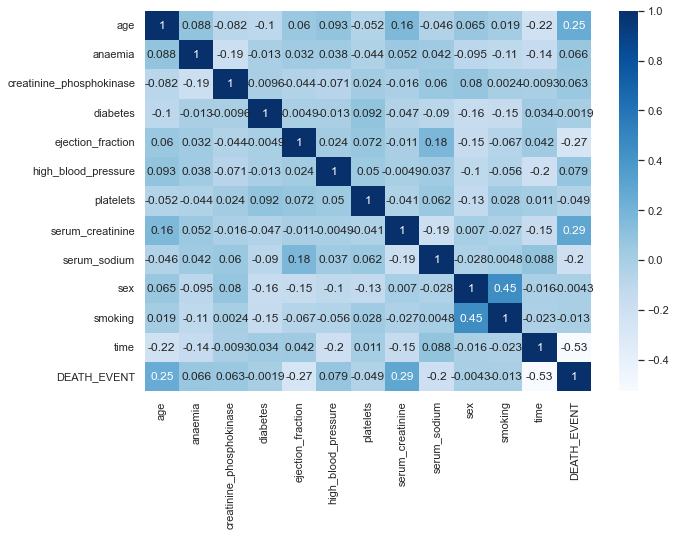

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(Hf_data.corr(), annot=True,cmap='Blues')
plt.show()

# From the above Correlation table we are able to make out the below findings for people diagnosed with Heartfailure 

#Having high serum_creatinine are more at more risk to have Death event
#Having low ejection_fraction are more at more risk to have Death event.
#Having less followup time post diagnosisare are at more risk to have Death event.

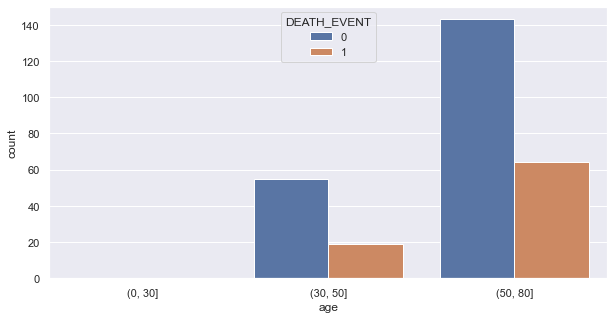

In [14]:
#The effect of age
hf_v=Hf_data.copy()
plt.figure(figsize=(10,5))
bins=[0,30,50,80]
sns.countplot(x=pd.cut(hf_v.age,bins=bins),hue=hf_v.DEATH_EVENT)
plt.show()

#50 yrs to 80yrs people diagnosed for Hearthfalilure condition  are more likely to have risk of detha event than the age group below 50yrs 

#Models testing

#Logistic regression model 

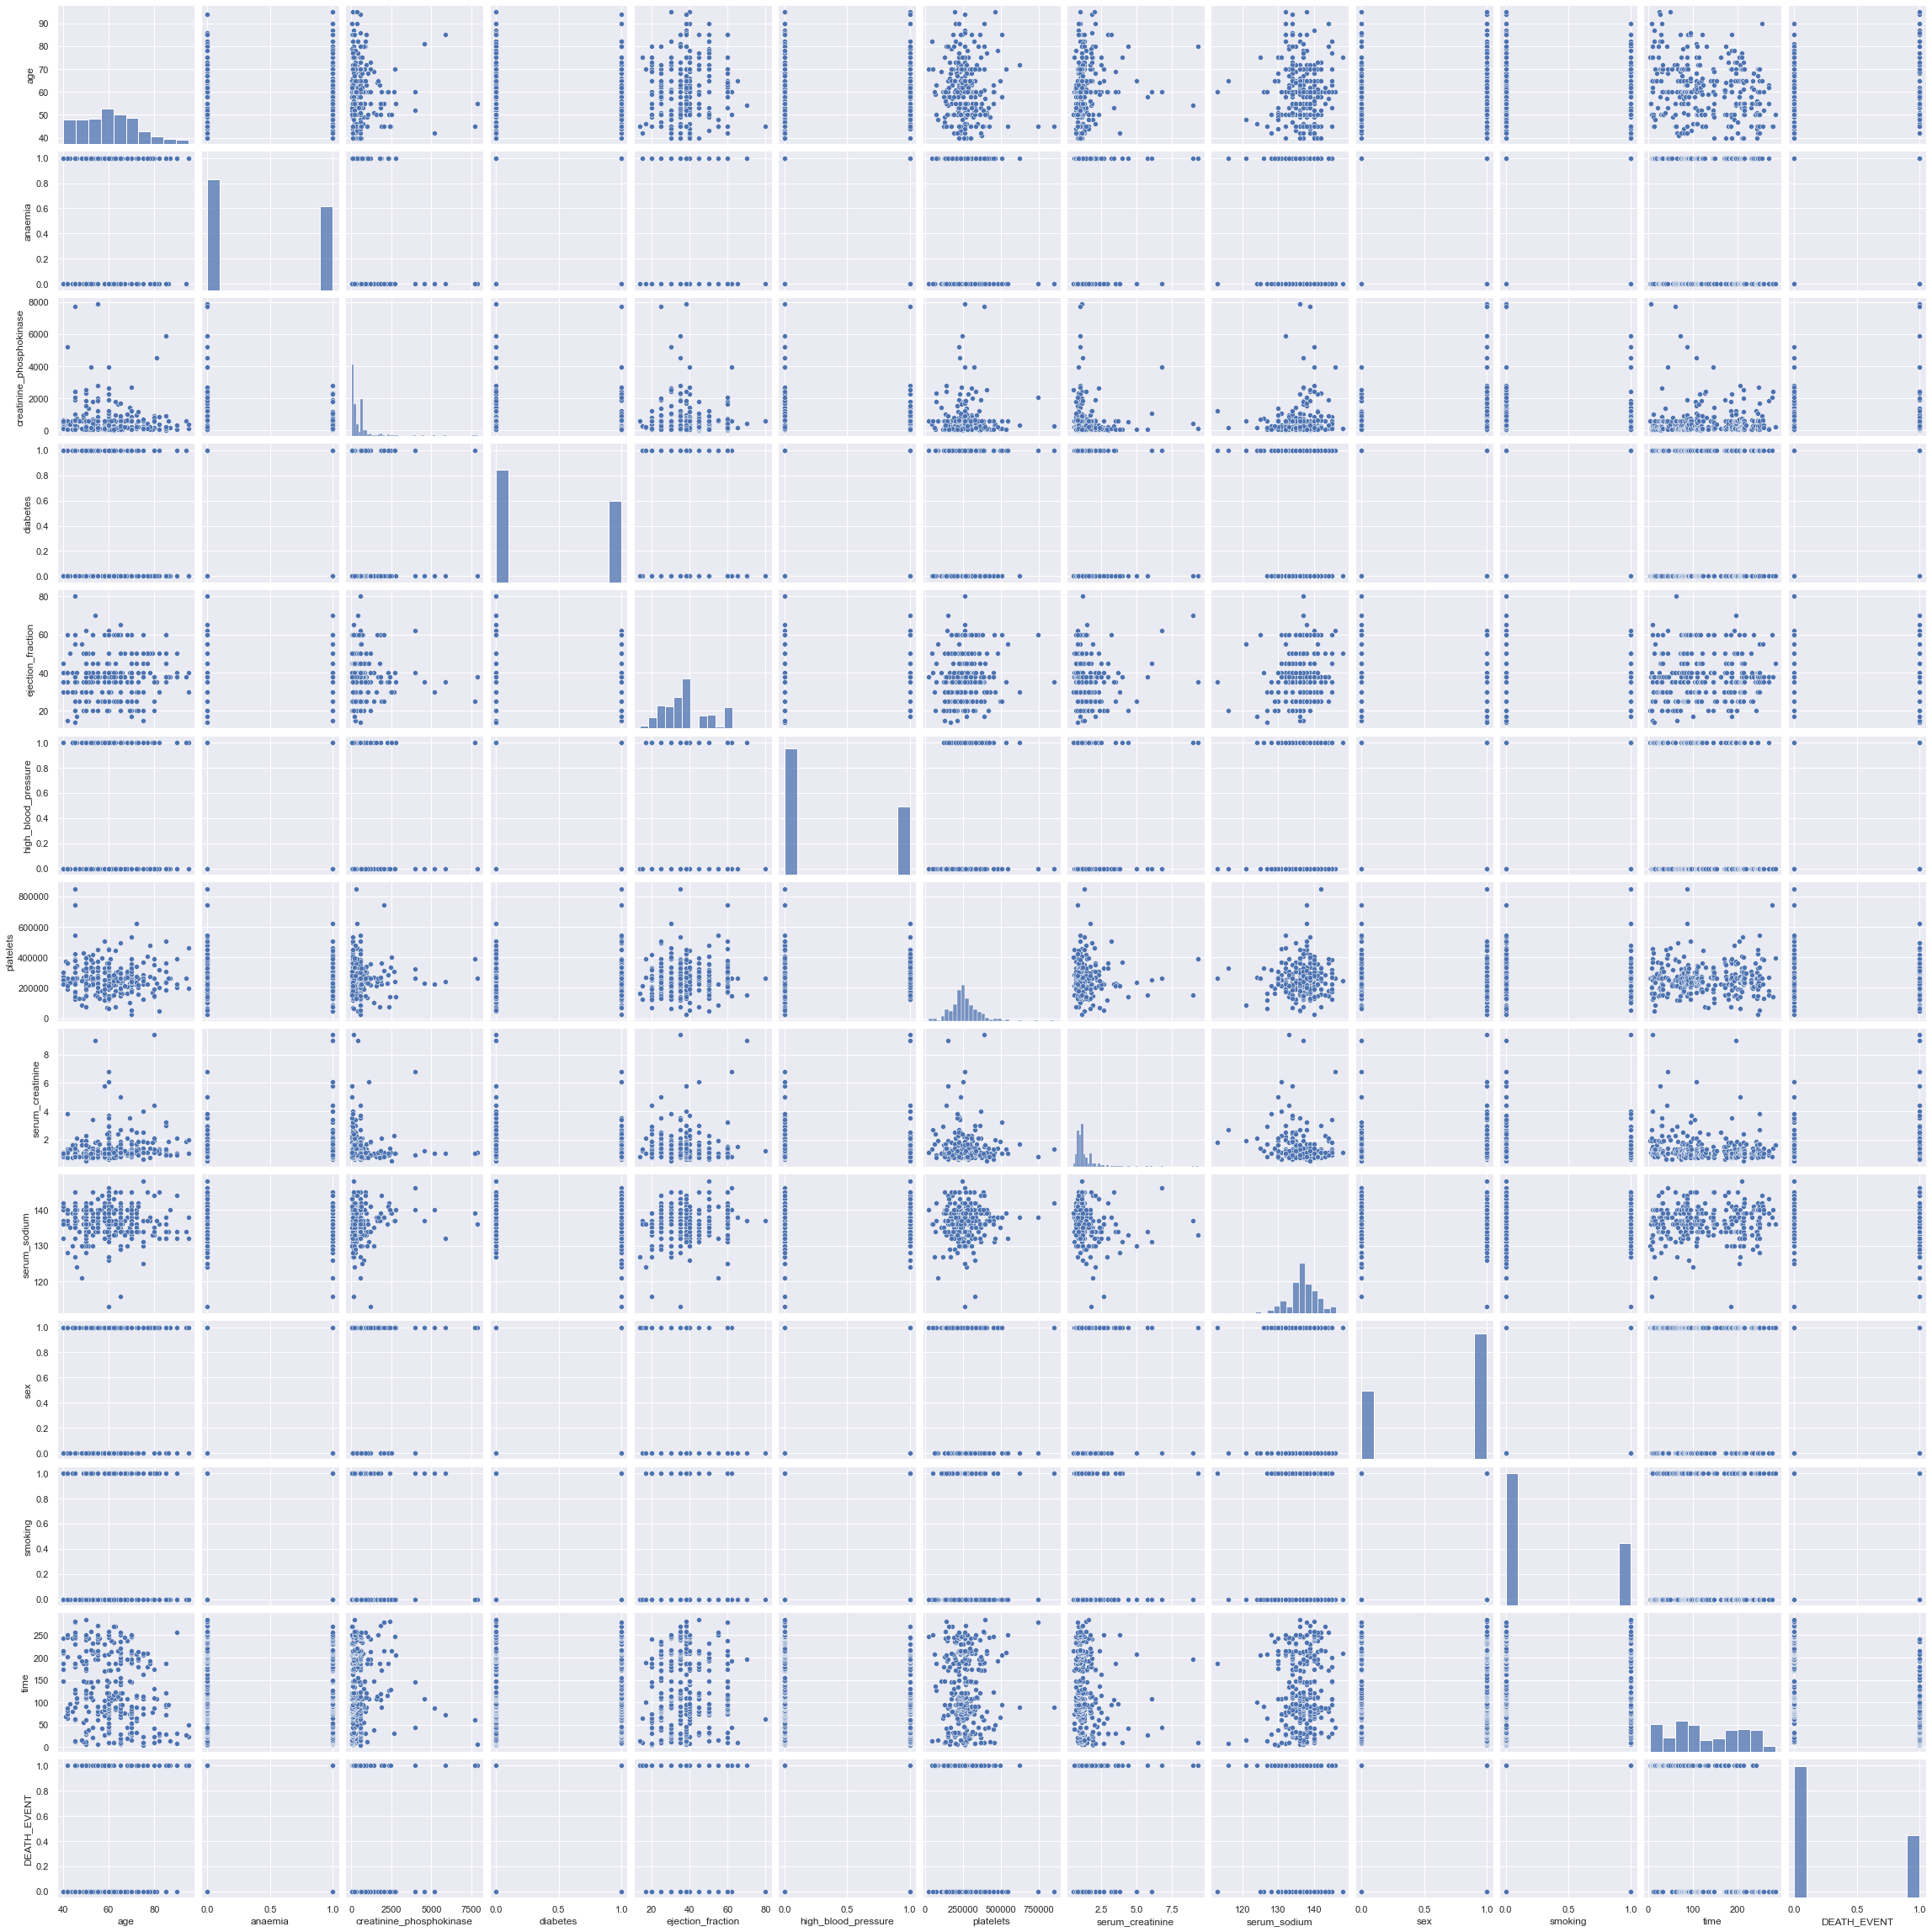

In [15]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Hf_data)

In [16]:
# Dividing our data into input and output variables 
X = Hf_data.iloc[:,:12]
Y = Hf_data.iloc[:,12]

In [17]:
X = Hf_data.iloc[:,:12]
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0000,0,582,0,20,1,265000.0000,1.9000,130,1,0,4
1,55.0000,0,7861,0,38,0,263358.0300,1.1000,136,1,0,6
2,65.0000,0,146,0,20,0,162000.0000,1.3000,129,1,1,7
3,50.0000,1,111,0,20,0,210000.0000,1.9000,137,1,0,7
4,65.0000,1,160,1,20,0,327000.0000,2.7000,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0000,0,61,1,38,1,155000.0000,1.1000,143,1,1,270
295,55.0000,0,1820,0,38,0,270000.0000,1.2000,139,0,0,271
296,45.0000,0,2060,1,60,0,742000.0000,0.8000,138,0,0,278
297,45.0000,0,2413,0,38,0,140000.0000,1.4000,140,1,1,280


In [18]:
Y = Hf_data.iloc[:,12]
Y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

# Rescaling the features --------- important to do standardisation/normalisation. There are two common ways of rescaling:

Normalisation(Min-Max scaling) Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [19]:
# using standarisation technique for scaling 
scaler = StandardScaler()
X_scaled =scaler.fit_transform(Hf_data.iloc[:,:12]) 
X_scaled

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [20]:
# Model Building

In [21]:
#Logistic regression and fit the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_scaled,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#Predict for X dataset
y_pred = classifier.predict(X_scaled)

In [23]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X_scaled)})

In [24]:
y_pred_df

,actual,predicted_prob
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
294,0,0
295,0,0
296,0,0
297,0,0


# Finding model accuracy 

In [26]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[187  16]
 [ 28  68]]


In [27]:
((187+68)/(187+16+28+68))*100

85.28428093645485

In [28]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       203
           1       0.81      0.71      0.76        96

    accuracy                           0.85       299
   macro avg       0.84      0.81      0.83       299
weighted avg       0.85      0.85      0.85       299



# ROC Curve

Text(0, 0.5, 'True Positive Rate')

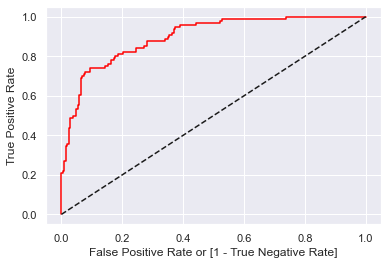

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X_scaled)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [30]:
auc

0.8147577996715928

#We are able to build alogistic model with 81% acuracy

# Model validation - by different validation teachniques

In [31]:
 # Evaluating using Train test split method

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = X_scaled
Y = Y
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
train_result = model.score(X_train, Y_train)
test_result = model.score(X_test, Y_test)

In [34]:
train_result*100, test_result*100

(82.0, 85.85858585858585)

In [35]:
# Evaluate using Cross Validation

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [37]:
X = X_scaled
Y = Y
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=400)
results = cross_val_score(model, X, Y, cv=kfold)

In [38]:
results

array([0.76666667, 0.8       , 0.83333333, 0.86666667, 0.8       ,
       0.96666667, 0.86666667, 0.8       , 0.63333333, 0.86206897])

In [39]:
results.mean()*100.0

81.95402298850576

In [40]:
results.std()*100.0

8.167069076935633

In [41]:
#Evaluate using Leave One Out Cross Validation

In [42]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
X = X 
Y = Y
loocv = LeaveOneOut()
model = LogisticRegression(max_iter=300)
results = cross_val_score(model, X, Y, cv=loocv)

In [43]:
results.mean()*100.0

82.6086956521739


# Conclusion: 
Patient survival rate can increase after heart failure by focusing mainly on serum creatinine and ejection fraction and also by having regular follow up check-up time.

We were able to build a logistic regression model with 82 % accuracy. 

Model builing on serum creatinine and ejection fraction will incerase the predictions accurate than using the original dataset features in its entirety.